# Lab #2

### Performed by: Belenko Pavel & Umnov Yuri

In [300]:
import pylab
import numpy as np
import scipy as sp
import pandas as pd
from math import inf
import sklearn as sk
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

---
### Step 0 - Data preparation. 

### The data was taken from the database: https://www.kaggle.com/rustydigg918/exploratory-data-analysis-on-car-sales-data/data

### NOTE. For this lab you need subsample with 5-10 random variables, at least half ofthem should be described with continuous random variable type. Target variableshould be continuous.

In [301]:
sales_df = pd.read_csv('Car_Sales.csv')
sales_df = sales_df.drop(sales_df.columns[0], axis = 1)
sales_df.head(10)

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Country,Tax_type
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,Japan,2.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,Japan,5.0
2,Acura,CL,14.114,18.225,Passenger,30.60,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.361224,Japan,5.0
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,Japan,5.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,Germany,2.0
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,Germany,4.0
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,Germany,7.0
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,Germany,3.0
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069,Germany,4.0
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724,Germany,4.0


In [302]:
sales_df = sales_df[['Vehicle_type', 'Price_in_thousands',
                    'Engine_size', 'Horsepower','Curb_weight',
                    'Fuel_capacity', 'Power_perf_factor']]

sales_df['Vehicle_type'] = [(lambda x: x != sales_df['Vehicle_type'][0] and 1 or 0)(sales_df['Vehicle_type'][i]) for i in range(len(sales_df))]
    
cols = sales_df.columns.tolist()
sales_df.head(10)

,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Power_perf_factor
0,0,21.50,1.8,140.0,2.639,13.2,58.280150
1,0,28.40,3.2,225.0,3.517,17.2,91.370778
2,0,30.60,3.2,225.0,3.470,17.2,91.361224
3,0,42.00,3.5,210.0,3.850,18.0,91.389779
4,0,23.99,1.8,150.0,2.998,16.4,62.777639
5,0,33.95,2.8,200.0,3.561,18.5,84.565105
6,0,62.00,4.2,310.0,3.902,23.7,134.656858
7,0,26.99,2.5,170.0,3.179,16.6,71.191207
8,0,33.40,2.8,193.0,3.197,16.6,81.877069
9,0,38.90,2.8,193.0,3.472,18.5,83.998724


---
### Step 1 - You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

<Figure size 1440x1440 with 0 Axes>

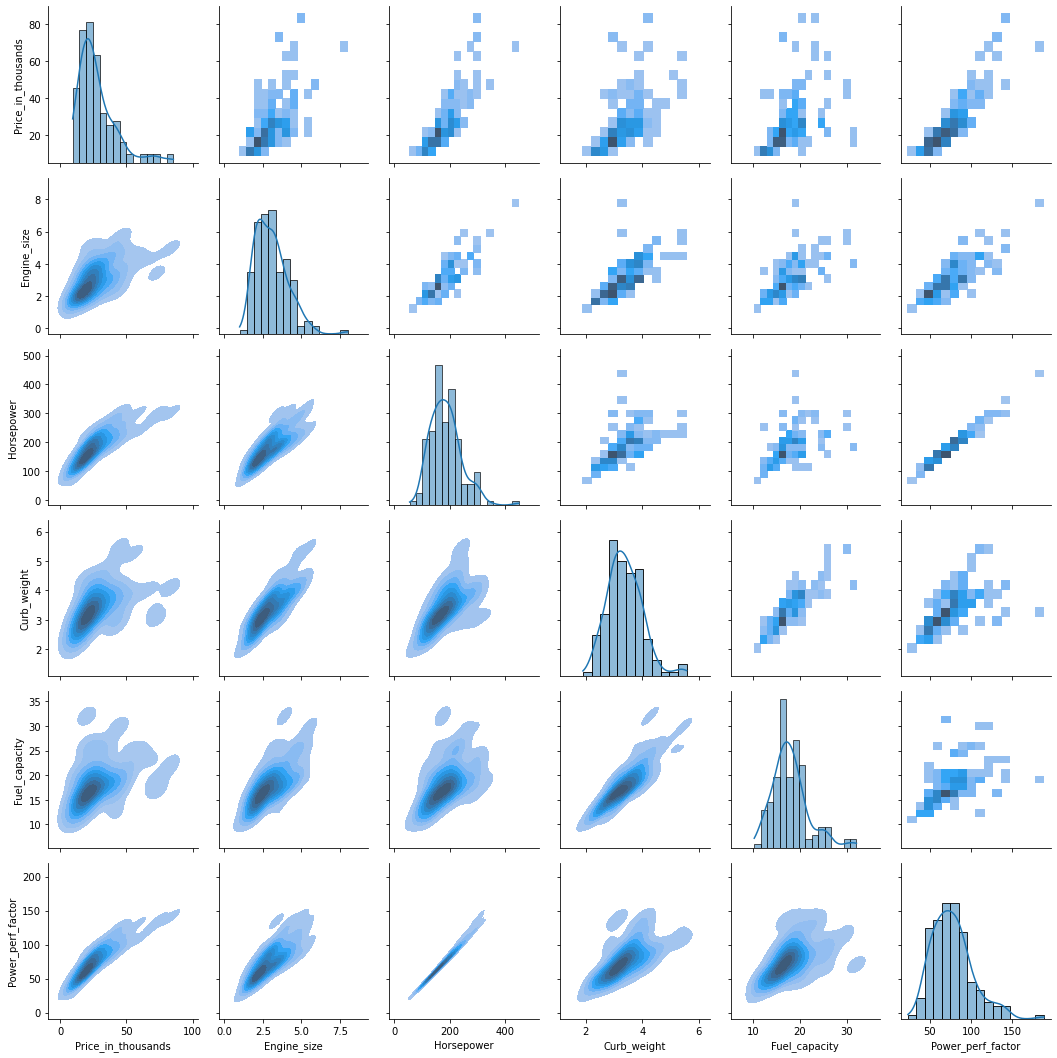

In [303]:
fig = plt.figure(figsize = (20, 20))
g = sns.PairGrid(sales_df[cols[1:]], vars = cols[1:])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot, kde = True)

---
### Step 2 - You need to make an estimation of multivariate mathematical expectation and variance.

In [305]:
table = PrettyTable()
table.field_names = ["Column name", "mathematical expectation", "variance"]

for i in range(0, len(cols)-1):
    table.add_row([str(cols[i]), str(sales_df.mean()[i]), str(sales_df.var()[i])])
print(table)

+--------------------+--------------------------+---------------------+
|    Column name     | mathematical expectation |       variance      |
+--------------------+--------------------------+---------------------+
|    Vehicle_type    |    0.2564102564102564    | 0.19189412737799827 |
| Price_in_thousands |    27.411326923076903    |  204.7071317440447  |
|    Engine_size     |    3.060897435897434     |  1.0912998345740283 |
|     Horsepower     |    185.94871794871796    |  3214.926385442515  |
|    Curb_weight     |    3.381134615384615     |  0.3964752785359802 |
|   Fuel_capacity    |    17.951923076923084    |  15.115931761786593 |
+--------------------+--------------------------+---------------------+


---
### Step 3 - You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

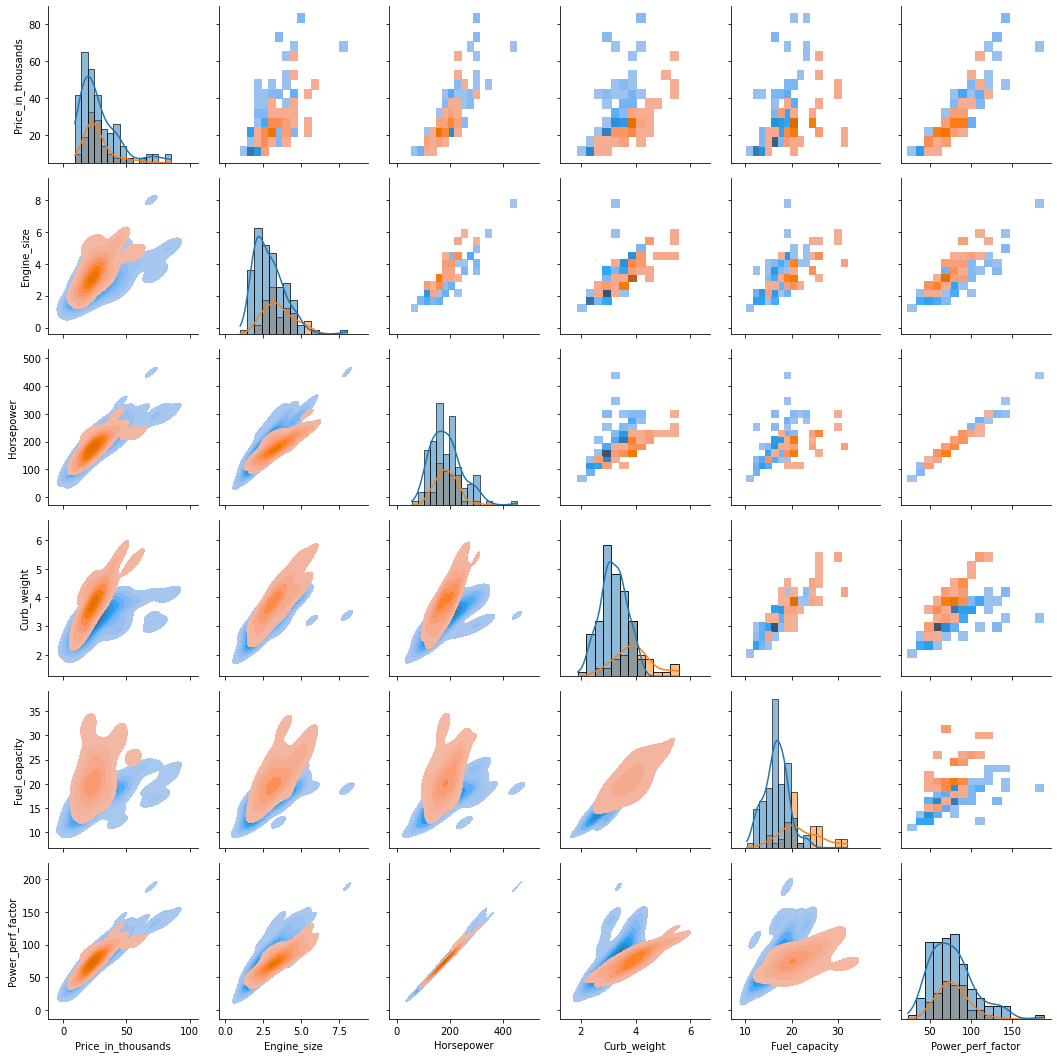

In [306]:
g = sns.PairGrid(sales_df, hue = cols[0])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot, kde = True)

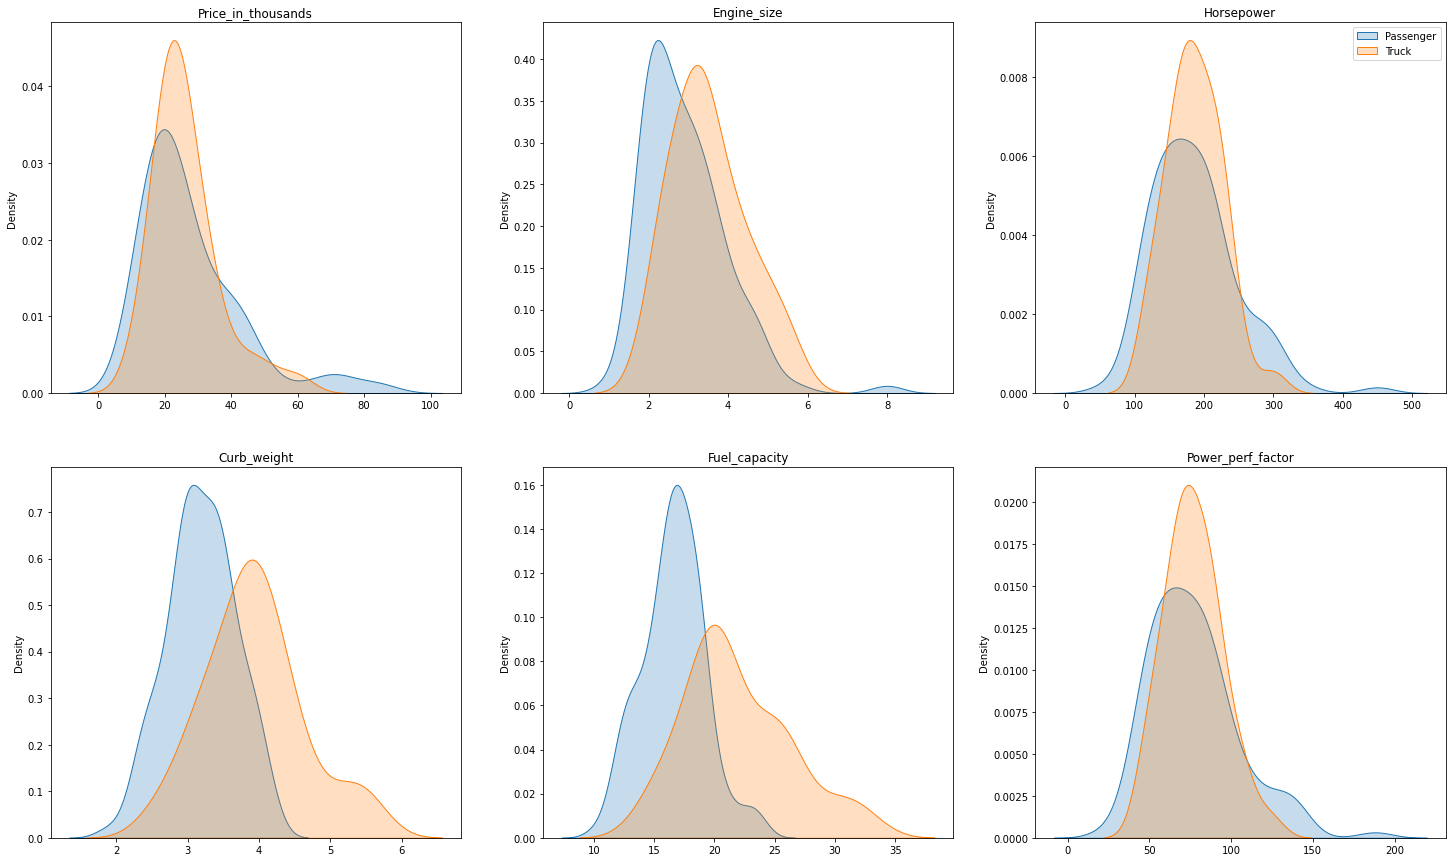

In [308]:
# list of variables without categorial value Vehicle_type
w = cols[1:] 

# we make only the most popular maps estimation otherwise the graphs will become unreadable
fig = plt.subplots(2, 3, figsize = (25, 15))

for i, col in enumerate(w):
    
    plt.subplot(2, 3, i + 1)
    
    sns.kdeplot(sales_df.loc[sales_df['Vehicle_type'] == 0, col], shade = True, label = 'Passenger')
    sns.kdeplot(sales_df.loc[sales_df['Vehicle_type'] == 1, col], shade = True, label = "Truck")
    
    plt.xlabel('')
    plt.title(col)
    
    if i == 2:
        plt.legend(loc = 'upper right')
    else:
        plt.legend().remove()
        
plt.show()

In [309]:
# output mean and var grouped by maps
vt_df = sales_df.groupby('Vehicle_type')
table = PrettyTable()
table.field_names = ["Vehicle type", "Column name", "m.expectation", "variance"]

for vtype, group in vt_df:
    
    table.add_row(['' for i in range(4)])
    
    table.add_row([(lambda x: not x and 'Passenger' or 'Truck')(vtype), w[0],
                   str(group[w[0]].mean())[:10], str(group[w[0]].var())[:10]])
    
    for i in range (1, len(w)):
        
        table.add_row(['', w[i], str(group[w[i]].mean())[:10], str(group[w[i]].var())[:10]])
            
table.align["Column name"] = 'l'

print(table)

+--------------+--------------------+---------------+------------+
| Vehicle type | Column name        | m.expectation |  variance  |
+--------------+--------------------+---------------+------------+
|              |                    |               |            |
|  Passenger   | Price_in_thousands |   27.7876551  | 240.280485 |
|              | Engine_size        |   2.90258620  | 1.06234107 |
|              | Horsepower         |   185.793103  | 3797.74812 |
|              | Curb_weight        |   3.19011206  | 0.22739848 |
|              | Fuel_capacity      |   16.5922413  | 6.63341754 |
|              | Power_perf_factor  |   77.1823565  | 745.141112 |
|              |                    |               |            |
|    Truck     | Price_in_thousands |   26.319975   | 103.417420 |
|              | Engine_size        |   3.51999999  | 0.91394871 |
|              | Horsepower         |     186.4     | 1578.50256 |
|              | Curb_weight        |   3.93510000  | 0.481921

---
### Step 4 - You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [310]:
table = PrettyTable()
table.field_names = ["Variable", "Corr coefficient", "Significance level", "Confidence interval"]

for variable in w[1:]:
    
    r, p = sp.stats.pearsonr(sales_df[variable], sales_df['Price_in_thousands'])
    low = np.arctanh(r) - sp.stats.norm.ppf(0.475) / np.sqrt(sales_df[variable].size - 3)
    high = np.arctanh(r) + sp.stats.norm.ppf(0.475) / np.sqrt(sales_df[variable].size - 3)
    st, fin = np.tanh((low, high))
    table.add_row([variable, str(r)[:7], str(p)[:7], f"[{st} ... {fin}]"])
    
table.align = 'l'
table.align["Corr coefficient"] = 'r'
table.align["Significance level"] = 'r'
print(table)

+-------------------+------------------+--------------------+---------------------------------------------+
| Variable          | Corr coefficient | Significance level | Confidence interval                         |
+-------------------+------------------+--------------------+---------------------------------------------+
| Engine_size       |          0.62693 |            2.03843 | [0.6299974956393497 ... 0.6238434829669043] |
| Horsepower        |          0.83931 |            1.32342 | [0.8408033628825342 ... 0.8378066628878498] |
| Curb_weight       |          0.52880 |            1.28419 | [0.5324513521720792 ... 0.5251475630360884] |
| Fuel_capacity     |          0.42288 |            3.80772 | [0.4270361013427404 ... 0.4187102143811979] |
| Power_perf_factor |          0.89768 |            1.10350 | [0.8986632141220507 ... 0.8966945389000174] |
+-------------------+------------------+--------------------+---------------------------------------------+


---
### Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

Text(0.5, 1.0, 'Multivariate correlation matrix')

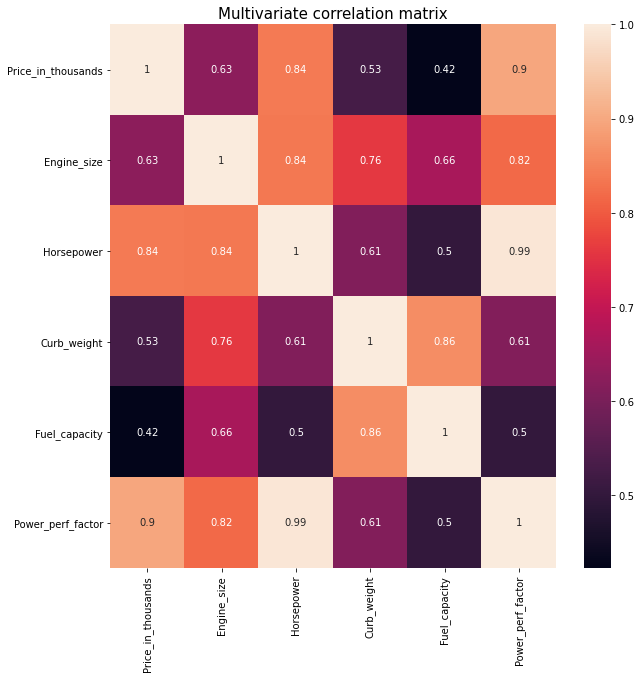

In [312]:
fig = plt.figure(figsize = (10, 10))
g = sns.heatmap(sales_df[cols[1:]].corr(), annot = True)
plt.title('Multivariate correlation matrix', fontsize = 15)

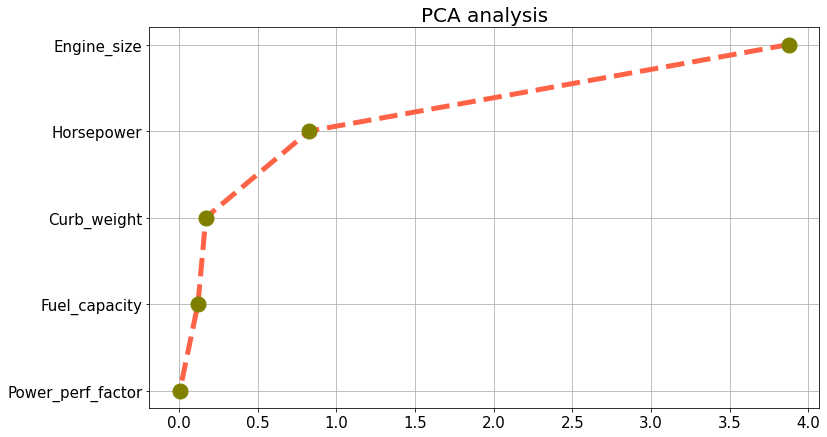

In [313]:
pca_df = sales_df[['Engine_size', 'Horsepower', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']]

pca_vars = sk.preprocessing.scale(pca_df)
pca_vars = pd.DataFrame(pca_vars, index = pca_df.index, columns = pca_df.columns)

plt.figure(figsize=(12,7))
pca = PCA().fit(pca_vars)

x = np.std(pca.transform(pca_vars), axis = 0) ** 2
y = - np.arange(len(x)) - 1

plt.plot(x, y, "o", markersize = 15, markerfacecolor = 'olive', markeredgecolor = 'olive',
         linewidth = 5, linestyle = '--', color = 'tomato')
plt.yticks(y, pca_vars.columns, fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('PCA analysis', fontsize = 20)

plt.grid()
plt.show()

---
### Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [314]:
subsample = sales_df[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Curb_weight','Fuel_capacity']].copy()
predictors = subsample.columns.tolist()[1:]
target = subsample.columns.tolist()[0]

train, test = sk.model_selection.train_test_split(subsample, test_size = 0.15, random_state = 7)
X_train, X_test = train[predictors], test[predictors]
y_train, y_test = train[target], test[target]

random_state = 7
table = PrettyTable()
table.field_names = ["Type", "Alpha", "MSE", "R2", "Coefficients"]

regr = sk.linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
table.add_row(["Least Squares model", "-" , str(mean_squared_error(y_test, predicted)),
               str(r2_score(y_test, predicted)), str(regr.coef_)])

best_lasso_alpha = -1
best_lasso_mse = inf
best_lasso_r2 = -1
best_lasso_coef = (0, 0, 0, 0)
for alpha in np.arange(0.0,1.001,0.001):
    
    regr = sk.linear_model.Lasso(alpha=alpha, random_state=random_state)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    curr_lasso_mse = mean_squared_error(y_test, predicted)
    curr_lasso_r2 = r2_score(y_test, predicted)
    curr_lasso_coef = regr.coef_
    
    if curr_lasso_mse < best_lasso_mse and curr_lasso_r2 > best_lasso_r2:
        
        best_lasso_alpha = alpha
        best_lasso_mse = curr_lasso_mse
        best_lasso_r2 = curr_lasso_r2
        best_lasso_coef = curr_lasso_coef

table.add_row(["Best Lasso model", best_lasso_alpha ,str(best_lasso_mse), str(best_lasso_r2), str(best_lasso_coef)])

best_ridge_alpha = -1
best_ridge_mse = inf
best_ridge_r2 = -1
best_ridge_coef = (0, 0, 0, 0)

for alpha in np.arange(0.0,1.001,0.001):
    
    regr = sk.linear_model.Ridge(alpha = alpha, random_state = random_state)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    curr_ridge_mse = mean_squared_error(y_test, predicted)
    curr_ridge_r2 = r2_score(y_test, predicted)
    curr_ridge_coef = regr.coef_
    
    if curr_ridge_mse < best_ridge_mse and curr_ridge_r2 > best_ridge_r2:
        
        best_ridge_alpha = alpha
        best_ridge_mse = curr_ridge_mse
        best_ridge_r2 = curr_ridge_r2
        best_ridge_coef = curr_ridge_coef

table.add_row(["Best Ridge model", best_ridge_alpha ,str(best_ridge_mse), str(best_ridge_r2), str(best_ridge_coef)])

print(table)

<ipython-input-314-300172c34041>:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr.fit(X_train, y_train)
C:\Users\belpa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\belpa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3637.514018039202, tolerance: 2.9629148498628783
  model = cd_fast.enet_coordinate_descent(


+---------------------+-------+--------------------+---------------------+---------------------------------------------------+
|         Type        | Alpha |        MSE         |          R2         |                    Coefficients                   |
+---------------------+-------+--------------------+---------------------+---------------------------------------------------+
| Least Squares model |   -   | 45.89815331679849  |  0.4595347042821105 | [-6.16378248  0.28805914  4.08754026  0.02081387] |
|   Best Lasso model  | 0.069 | 45.72528134038459  |  0.4615703265697654 | [-5.62771303  0.28450679  2.99989526  0.10320016] |
|   Best Ridge model  |  1.0  | 45.696437462280755 | 0.46190997237210174 | [-5.87238913  0.28583261  3.57076605  0.05934957] |
+---------------------+-------+--------------------+---------------------+---------------------------------------------------+


---
### Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).

Statistic: 3.063
15.0: 0.562, data does not look normal (reject H0)
10.0: 0.640, data does not look normal (reject H0)
5.0: 0.768, data does not look normal (reject H0)
2.5: 0.896, data does not look normal (reject H0)
1.0: 1.066, data does not look normal (reject H0)


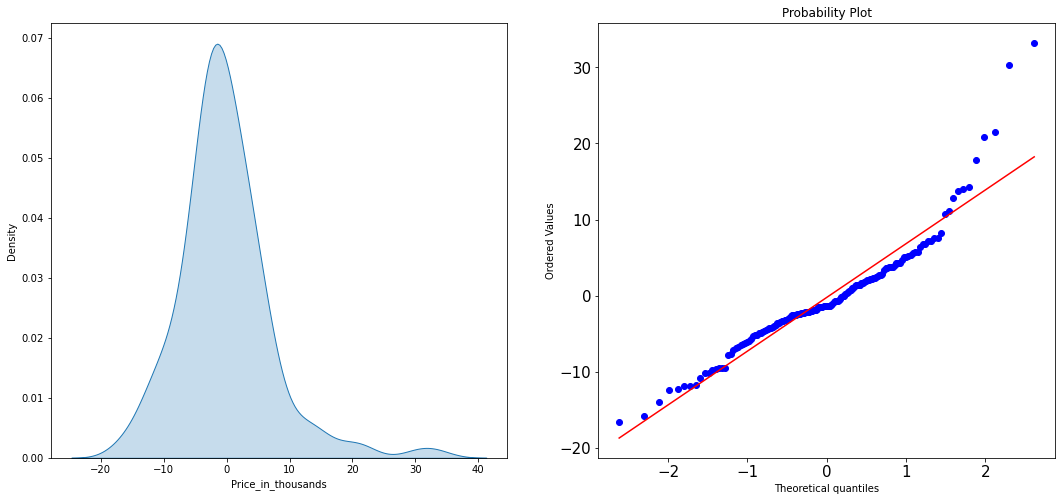

In [315]:
model = sk.linear_model.LinearRegression()
#model = sk.linear_model.Lasso()
#model = sk.linear_model.Ridge()

model.fit(X_train, y_train)
predicted = model.predict(X_test)

residuals = sales_df[target] - model.predict(sales_df[predictors])
residuals.describe()

result = sp.stats.anderson(residuals, dist = 'norm')
print('Statistic: %.3f' % result.statistic)

for i in range(len(result.critical_values)):
    
    sl, cv = result.significance_level[i], result.critical_values[i]
    
    if result.statistic < result.critical_values[i]:
        print('%.1f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.1f: %.3f, data does not look normal (reject H0)' % (sl, cv))

sp.stats.kstest(residuals, 'norm', args = (residuals.mean(), residuals.var())) 

fig, axes = plt.subplots(1, 2, figsize = (18, 8))  

sns.kdeplot(residuals, shade = True, ax = axes[0])
sp.stats.probplot(residuals, dist = "norm", plot = axes[1])

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

pylab.show()
